In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/cpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing


import gensim

C:\Users\moshi\AppData\Local\Temp\ipykernel_1656\1746252544.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df = pd.read_excel('mental_health_dataset_bangla.xlsx')

In [4]:
df.head

<bound method NDFrame.head of                                              Description Mental_State
0       প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনি...    Addiction
1      আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...    Addiction
2      আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...    Addiction
3       আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...    Addiction
4      চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...    Addiction
...                                                  ...          ...
10282         প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন      Neutral
10283  কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...      Neutral
10284   ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...      Neutral
10285   দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...      Neutral
10286   আগে কেউ সরকারের সমালোচনা করতে পারত না, দেশবির...      Neutral

[10287 rows x 2 columns]>

In [5]:
df.isnull()

,Description,Mental_State
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10282,False,False
10283,False,False
10284,False,False
10285,False,False


In [6]:
df.dropna(inplace=True)

In [7]:
df.groupby("Mental_State").describe()

Description         \
                       count unique   
Mental_State                          
Addiction                921    916   
Alcoholism               986    983   
Anxiety                  991    991   
Aspergers                789    787   
BPD                      995    995   
Bipolar                 1000   1000   
Depression               943    942   
Neutral                 1002   1002   
Schizophrenia            988    987   
Self Harm                671    671   
Suicidal Thought        1001   1000   

                                                                          
                                                                top freq  
Mental_State                                                              
Addiction         আমি ৬ বছর বয়সী এবং আমি ধূমপান শুরু করতে চাই, ...    2  
Alcoholism        আমি এটার সাথে আমার প্রথম লড়াই থেকে আমার পাঠ শ...    2  
Anxiety            আমি জানি এটা শুধু একটা চিন্তা কিন্তু আমি ঘৃণা...    1  
Aspergers         তাই আমি আমার জীবনে অনেক কঠিন মুহুর্তের মধ্য দি...    2  
BPD               আমি মনে করি আমি সবসময় ভালবাসা কঠিন হবে এবং শে...    1  
Bipolar           অন্য কেউ কি চরম অত্যধিক সংবেদনশীলতা ভোগ করেন? ...    1  
Depression        আমি এখন পর্যন্ত ২৯ সালের সবচেয়ে কম শুরু করছি।...    2  
Neutral            তুমি কি পেলে? আমার দিন ঠিক আছে.. এখনও কিছু কর...    1  
Schizophrenia     হাসপাতালে ভর্তি হতে আপনার বা প্রিয়জনের কি হয়...    2  
Self Harm         আমার মেয়ের বয়স ৪ এবং গত বছর তার সেরা বন্ধু ত...    1  
Suicidal Thought  খারাপ স্ত্রী/মা আমি দুঃখিত। আমি নিশ্চিত নই যে ...    2

In [8]:
df["Mental_State"].value_counts()

Neutral             1002
Suicidal Thought    1001
Bipolar             1000
BPD                  995
Anxiety              991
Schizophrenia        988
Alcoholism           986
Depression           943
Addiction            921
Aspergers            789
Self Harm            671
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


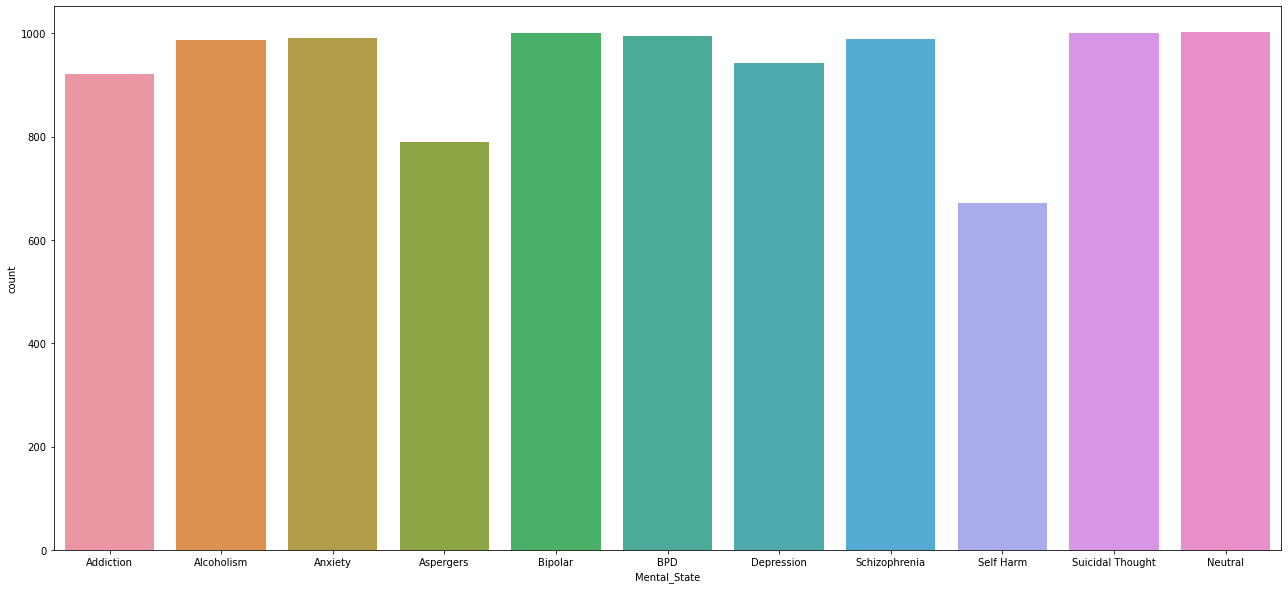

In [9]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [10]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

13931


In [11]:
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata

In [12]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

C:\Users\moshi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
#remove special character
def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)
#remove non bangla character
def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Z]', flags=re.I)
    return pattern.sub(r'', text)
#remove non empticons character
def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#remove noise
def Remove_text(text):
    text = rem_special_characters(text)
    text = rem_non_bangla_characters(text)
    text = rem_emoticons(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(Remove_text)

In [14]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [15]:
stop_words = { "অবশ্য" ,"অনেক","অনেকে","অনেকেই","অন্তত","অথবা","অথচ","অর্থাত","অন্য","আজ","আছে","আপনার","আপনি","আবার","আমরা"
"আমাকে","আমাদের","আমার","আমি","আরও","আর","আগে","আগেই","আই","অতএব","আগামী","অবধি","অনুযায়ী","আদ্যভাগে","এই","একই","একে",
"একটি","এখন","এখনও","এখানে","এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের",
"ওখানে",
'কত',
"কবে",
'করতে',
"কয়েক"
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁাহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন",
"বিষয়টি",
"ব্যবহার",
"ব্যাপারে"
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য",
"জন্যওজে",
"জে",
"বেশ",
"দেন",
"তুলে",
"ছিলেন",
"চান",
"চায়",
"চেয়ে",
"মোট",
"যথেষ্ট",
"টি"}

In [16]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [17]:
df['Description'] = [remove_stop_words(tokenized_data(sent)) for sent in df['Description'].tolist()]

In [18]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

9014


In [19]:
train, test = train_test_split(df, test_size=0.2, stratify = df["Mental_State"], random_state = 42)
num_classes = 11
embed_num_dims = 300
max_seq_len = 50

x_train = train['Description']
x_test = test['Description']

y_train = train['Mental_State']
y_test = test['Mental_State']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Description'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)


encoding = {
    "Neutral":0,
    "Suicidal Thought":1,
    "Bipolar":2,
    "BPD":3,
    "Anxiety":4,
    "Schizophrenia":5,
    "Alcoholism":6,
    "Depression":7,
    "Addiction":8,
    "Aspergers":9,
    "Self Harm":10,
}

y_train = [encoding[x] for x in train['Mental_State']]
y_test = [encoding[x] for x in test['Mental_State']]



y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 28443
[[  37 5063  235 ...  148   44  417]
 [  37    1   54 ... 1116  350   31]
 [ 332  105   21 ...   46 1354    7]
 ...
 [   0    0    0 ...    0  977 4492]
 [ 756    4   10 ...   98   15    4]
 [   0    0    0 ... 1689  237   59]]


In [20]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('bn_glove.39M.300d.txt',encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedd_matrix = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix.shape)

(28444, 300)


# Random Search


In [21]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  max_pooling = keras.layers.GlobalMaxPooling1D()(cnn)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  model.summary()

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=4,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)


tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 40,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 35, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 40 Complete [00h 01m 04s]
val_accuracy: 0.5262390375137329

Best val_accuracy So Far: 0.5651117563247681
Total elapsed time: 01h 02m 11s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1668785820\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.30000000000000004
lstm_unit: 96
lstm_dropout: 0.5
Score: 0.5651117563247681
Trial summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.30000000000000004
lstm_unit: 96
lstm_dropout: 0.2
Score: 0.5651117563247681
Trial summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.30000000000000004
lstm_unit: 128
lstm_dropout: 0.4
Score: 0.5524781346321106
Trial summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.2
lstm_unit: 128
lstm_dropout: 0.30000000000000004
Score: 0.5369290709495544
Trial summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.2
lstm_unit: 96
lstm_dropout: 0.4
Score: 0.5369290709495544
Trial summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout:

In [22]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': None}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': None}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}


In [23]:
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])

Ya it comes here
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           8533200   
                                                                 
 conv1d (Conv1D)             (None, 48, 96)            86496     
                                                                 
 activation (Activation)     (None, 48, 96)            0         
                                                                 
 batch_normalization (BatchN  (None, 48, 96)           384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 96)            0         
                                            

In [24]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 35, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/35
129/129 [==============================] - 9s 64ms/step - loss: 2.9776 - accuracy: 0.2514 - val_loss: 2.1601 - val_accuracy: 0.3610
Epoch 2/35
129/129 [==============================] - 8s 64ms/step - loss: 1.6740 - accuracy: 0.5424 - val_loss: 1.7849 - val_accuracy: 0.4728
Epoch 3/35
129/129 [==============================] - 8s 64ms/step - loss: 0.9923 - accuracy: 0.7431 - val_loss: 1.9696 - val_accuracy: 0.4568
Epoch 4/35
129/129 [==============================] - 8s 63ms/step - loss: 0.8646 - accuracy: 0.8001 - val_loss: 1.7487 - val_accuracy: 0.5340
Epoch 5/35
129/129 [==============================] - 8s 62ms/step - loss: 0.4593 - accuracy: 0.9267 - val_loss: 1.8533 - val_accuracy: 0.5355
Epoch 6/35
129/129 [==============================] - 8s 64ms/step - loss: 0.4967 - accuracy: 0.9148 - val_loss: 1.7847 - val_accuracy: 0.5651
Epoch 7/35
129/129 [==============================] - 8s 63ms/step - loss: 0.3352 - accuracy: 0.9628 - val_loss: 2.0649 - val_accuracy: 0.5160

In [25]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

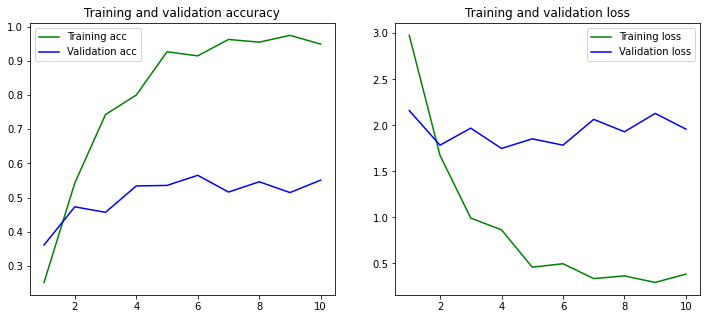

In [26]:
PlotGraph(history)

In [27]:
class_names = ["Neutral",
    "Suicidal Thought",
    "Bipolar",
    "BPD",
    "Anxiety",
    "Schizophrenia",
    "Alcoholism",
    "Depression",
    "Addiction",
    "Aspergers",
    "Self Harm",]

In [28]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

array([6, 8, 9, ..., 1, 6, 0], dtype=int64)

In [29]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([6, 8, 9, ..., 1, 6, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[165,   3,   4,   0,   4,   5,   4,  10,   1,   0,   5],
       [  5, 104,   7,   0,  10,   6,   6,  41,  12,   6,   3],
       [  4,   9,  81,   7,  24,  22,   6,  29,  10,   4,   4],
       [  1,  13,  21,  91,  10,   9,   7,  30,   8,   8,   1],
       [  3,  12,   7,   8, 117,   8,   6,  16,   8,   8,   5],
       [  2,   7,  12,   5,  15, 113,   5,  12,  10,  12,   5],
       [  0,   4,   2,   2,  12,   3, 147,   4,  19,   4,   0],
       [  2,  35,  11,  12,  13,   5,   4,  85,  10,   7,   5],
       [  0,   7,   9,   5,  11,   6,  21,   7, 112,   5,   1],
       [  2,   5,   8,  11,  12,  18,   6,  15,   3,  74,   4],
       [  6,   8,   4,   2,   5,   3,   3,  12,  14,   3,  74]],
      dtype=int64)

<AxesSubplot:>

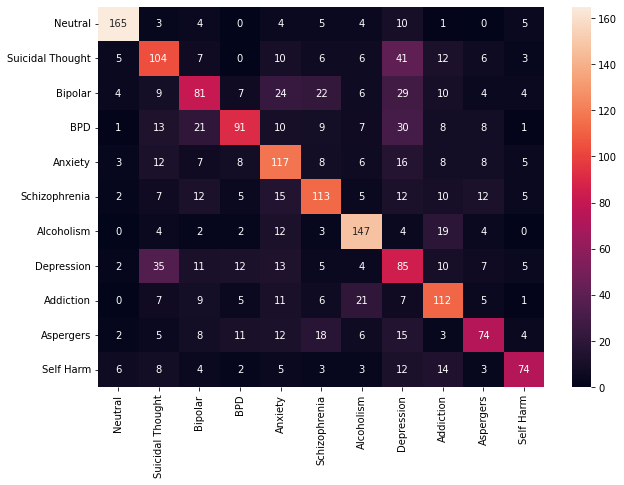

In [31]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [32]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

                  precision    recall  f1-score   support

         Neutral       0.87      0.82      0.84       201
Suicidal Thought       0.50      0.52      0.51       200
         Bipolar       0.49      0.41      0.44       200
             BPD       0.64      0.46      0.53       199
         Anxiety       0.50      0.59      0.54       198
   Schizophrenia       0.57      0.57      0.57       198
      Alcoholism       0.68      0.75      0.71       197
      Depression       0.33      0.45      0.38       189
       Addiction       0.54      0.61      0.57       184
       Aspergers       0.56      0.47      0.51       158
       Self Harm       0.69      0.55      0.61       134

        accuracy                           0.57      2058
       macro avg       0.58      0.56      0.57      2058
    weighted avg       0.58      0.57      0.57      2058

